<a href="https://colab.research.google.com/github/AVENIRT/AVENIRT/blob/main/house_prices_in_and_around_Seattle%2C_Washington.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### First, we will import our libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## For preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
### And read our data

data = pd.read_csv('kc_house_data[1].csv')

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data=data.drop(['id', 'date'],axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
## let's get more info about hour data, if there is any missing value

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [ ]:
### lest get some statiscal infos about hour data
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We notice how the last two look like repetitions of columns already in the dataset.

If you understand the real estate market, you’ll know ‘Price per Square feet’ is a word used often. this is the price for each sqft of the property, it is calculated by dividing the price by the total area of the house but on observing our data, there is no total square area, instead, we have square feet areas for the living room, parking lot, basement, and something called above, which we will assume means all other areas of the house not specified. Now we can engineer an estimated ‘total area’ feature from these features by simply adding them, in addition, we could add an age feature for each house(a factor that may also influence house prices), and whether or not the house has been renovated and more.


In [ ]:
### lets add more feature to our data , for fither analysis

data["Home_Age"] = 2023 - data["yr_built"]
data['is_renovated'] = data["yr_renovated"].where(data["yr_renovated"] == 0, 1)
data['Total_Area'] = data['sqft_living'] + data['sqft_lot'] + data['sqft_above'] + data['sqft_basement']
data['Basement'] = data['sqft_basement'].where(data["sqft_basement"] == 0, 1)

In [ ]:
##### lets run the new data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [ ]:
#### check if there is any missing value
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Home_Age         0
is_renovated     0
Total_Area       2
Basement         0
dtype: int64

We can see that sqt_above and Total_area presents 2 missing value. we need to fix them before progress in our analysis

In [ ]:
#### using dropna to fix missing value
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Home_Age         0
is_renovated     0
Total_Area       0
Basement         0
dtype: int64

Text(0.5, 0, 'House Age')

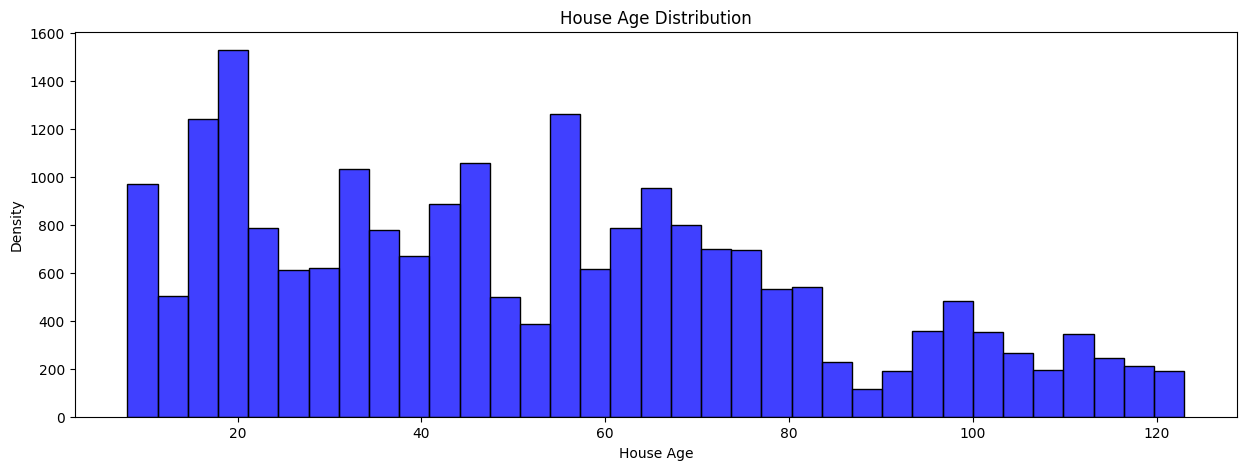

In [ ]:
### lets make a visualisation graph that can help us see the house year and house price
plt.figure(figsize=(15,5))
sns.histplot(data["Home_Age"], color="blue")
plt.title("House Age Distribution")
plt.ylabel("Density")
plt.xlabel("House Age")

Text(0.5, 0, 'price')

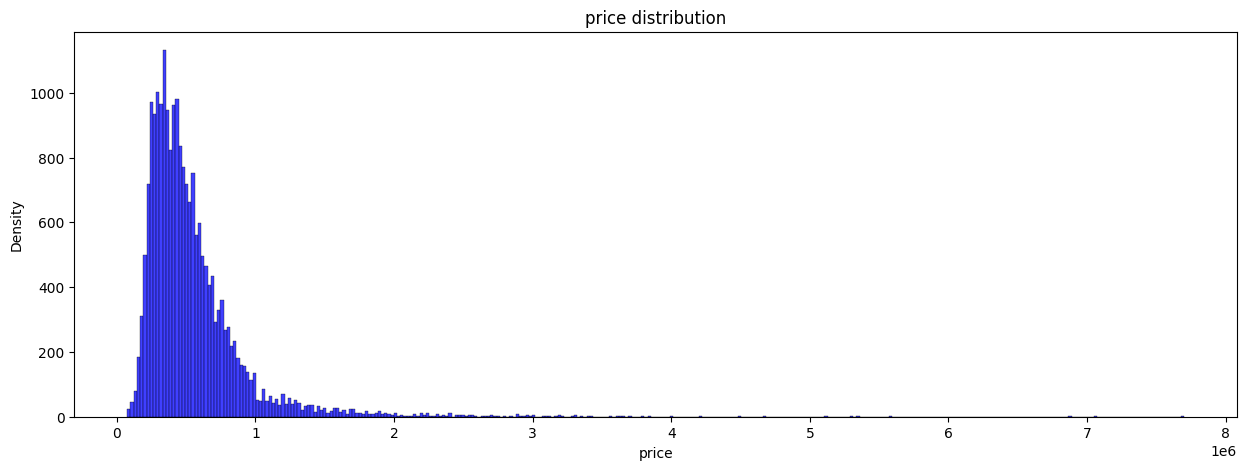

In [ ]:
#####  check the house price in terme of house age
plt.figure(figsize=(15,5))
sns.histplot(data["price"], color="blue")
plt.title("price distribution")
plt.ylabel("Density")
plt.xlabel("price")

<Axes: xlabel='long', ylabel='lat'>

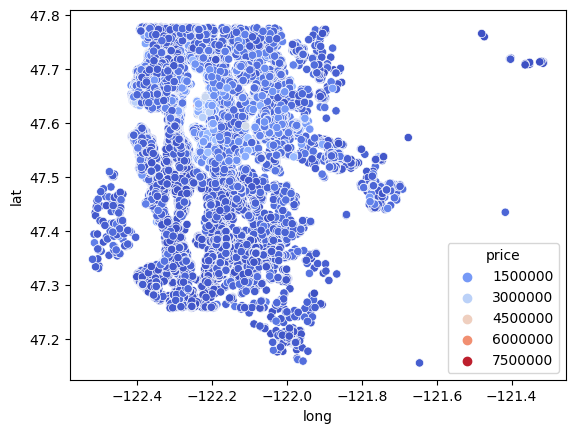

In [ ]:
# visualize the physical locations of the houses, highlighted by their corresponding prices
import seaborn as sns
sns.scatterplot(x='long',y='lat',hue='price' ,data=data, palette='coolwarm')

Now I want to do more analysis. But since we have many features, I just want to focus on the future that can inpact the price of house. So to do it, I need to to run and heat map

<Axes: >

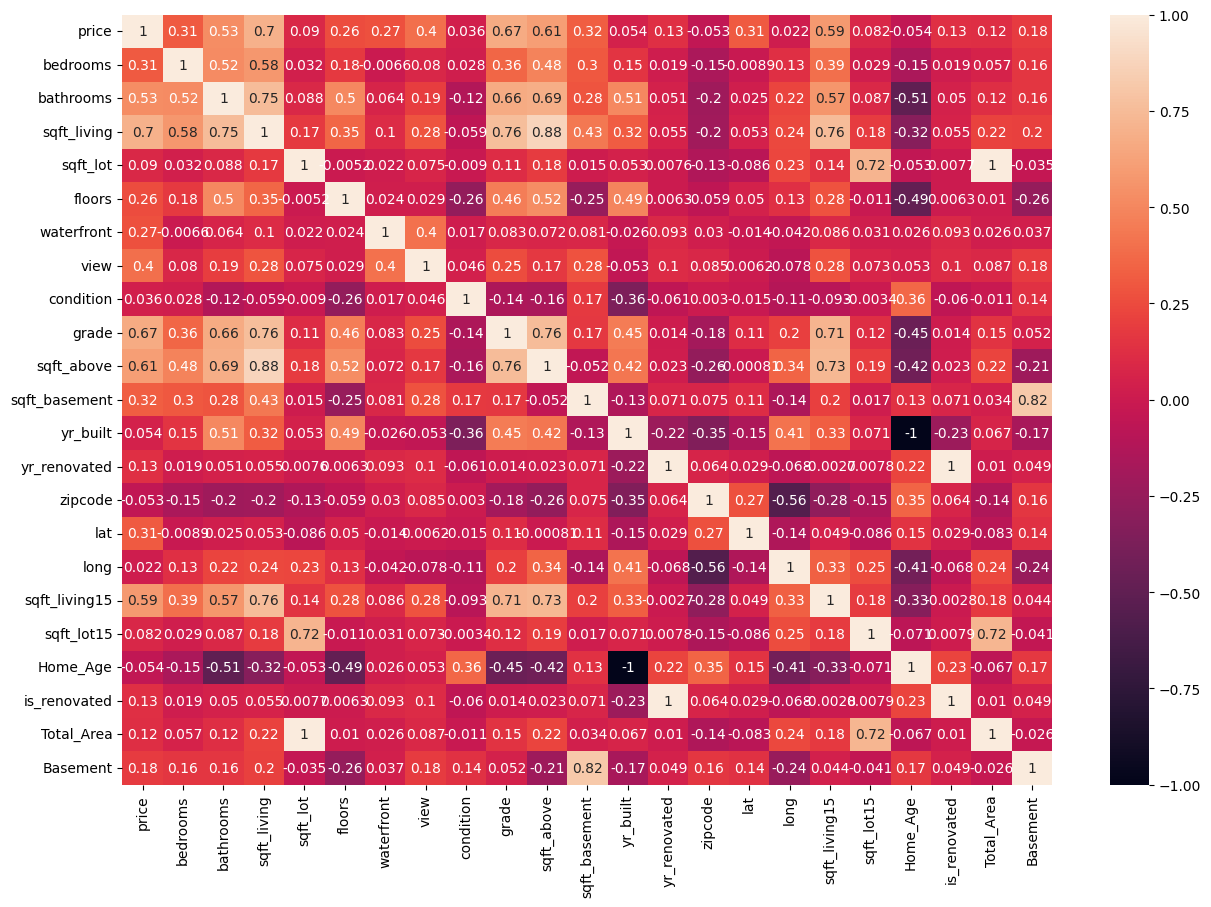

In [ ]:
#correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

we can see that sqft-living with an amazing 0.70 correlation to price, this means that it will be an important feature in building our model. grade, sqft_above, and bathrooms also have a high correlation, on the other hand, our Total_area feature seems to have a very low correlation with price.

In [ ]:
data.corr().price.sort_values(ascending=False)

price            1.000000
sqft_living      0.702055
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585377
bathrooms        0.525150
view             0.397299
sqft_basement    0.323842
bedrooms         0.308366
lat              0.307010
waterfront       0.266371
floors           0.256814
Basement         0.180215
yr_renovated     0.126436
is_renovated     0.126095
Total_Area       0.119762
sqft_lot         0.089661
sqft_lot15       0.082448
yr_built         0.054006
condition        0.036379
long             0.021613
zipcode         -0.053182
Home_Age        -0.054006
Name: price, dtype: float64

lets drop the feature with very low correlation with price.

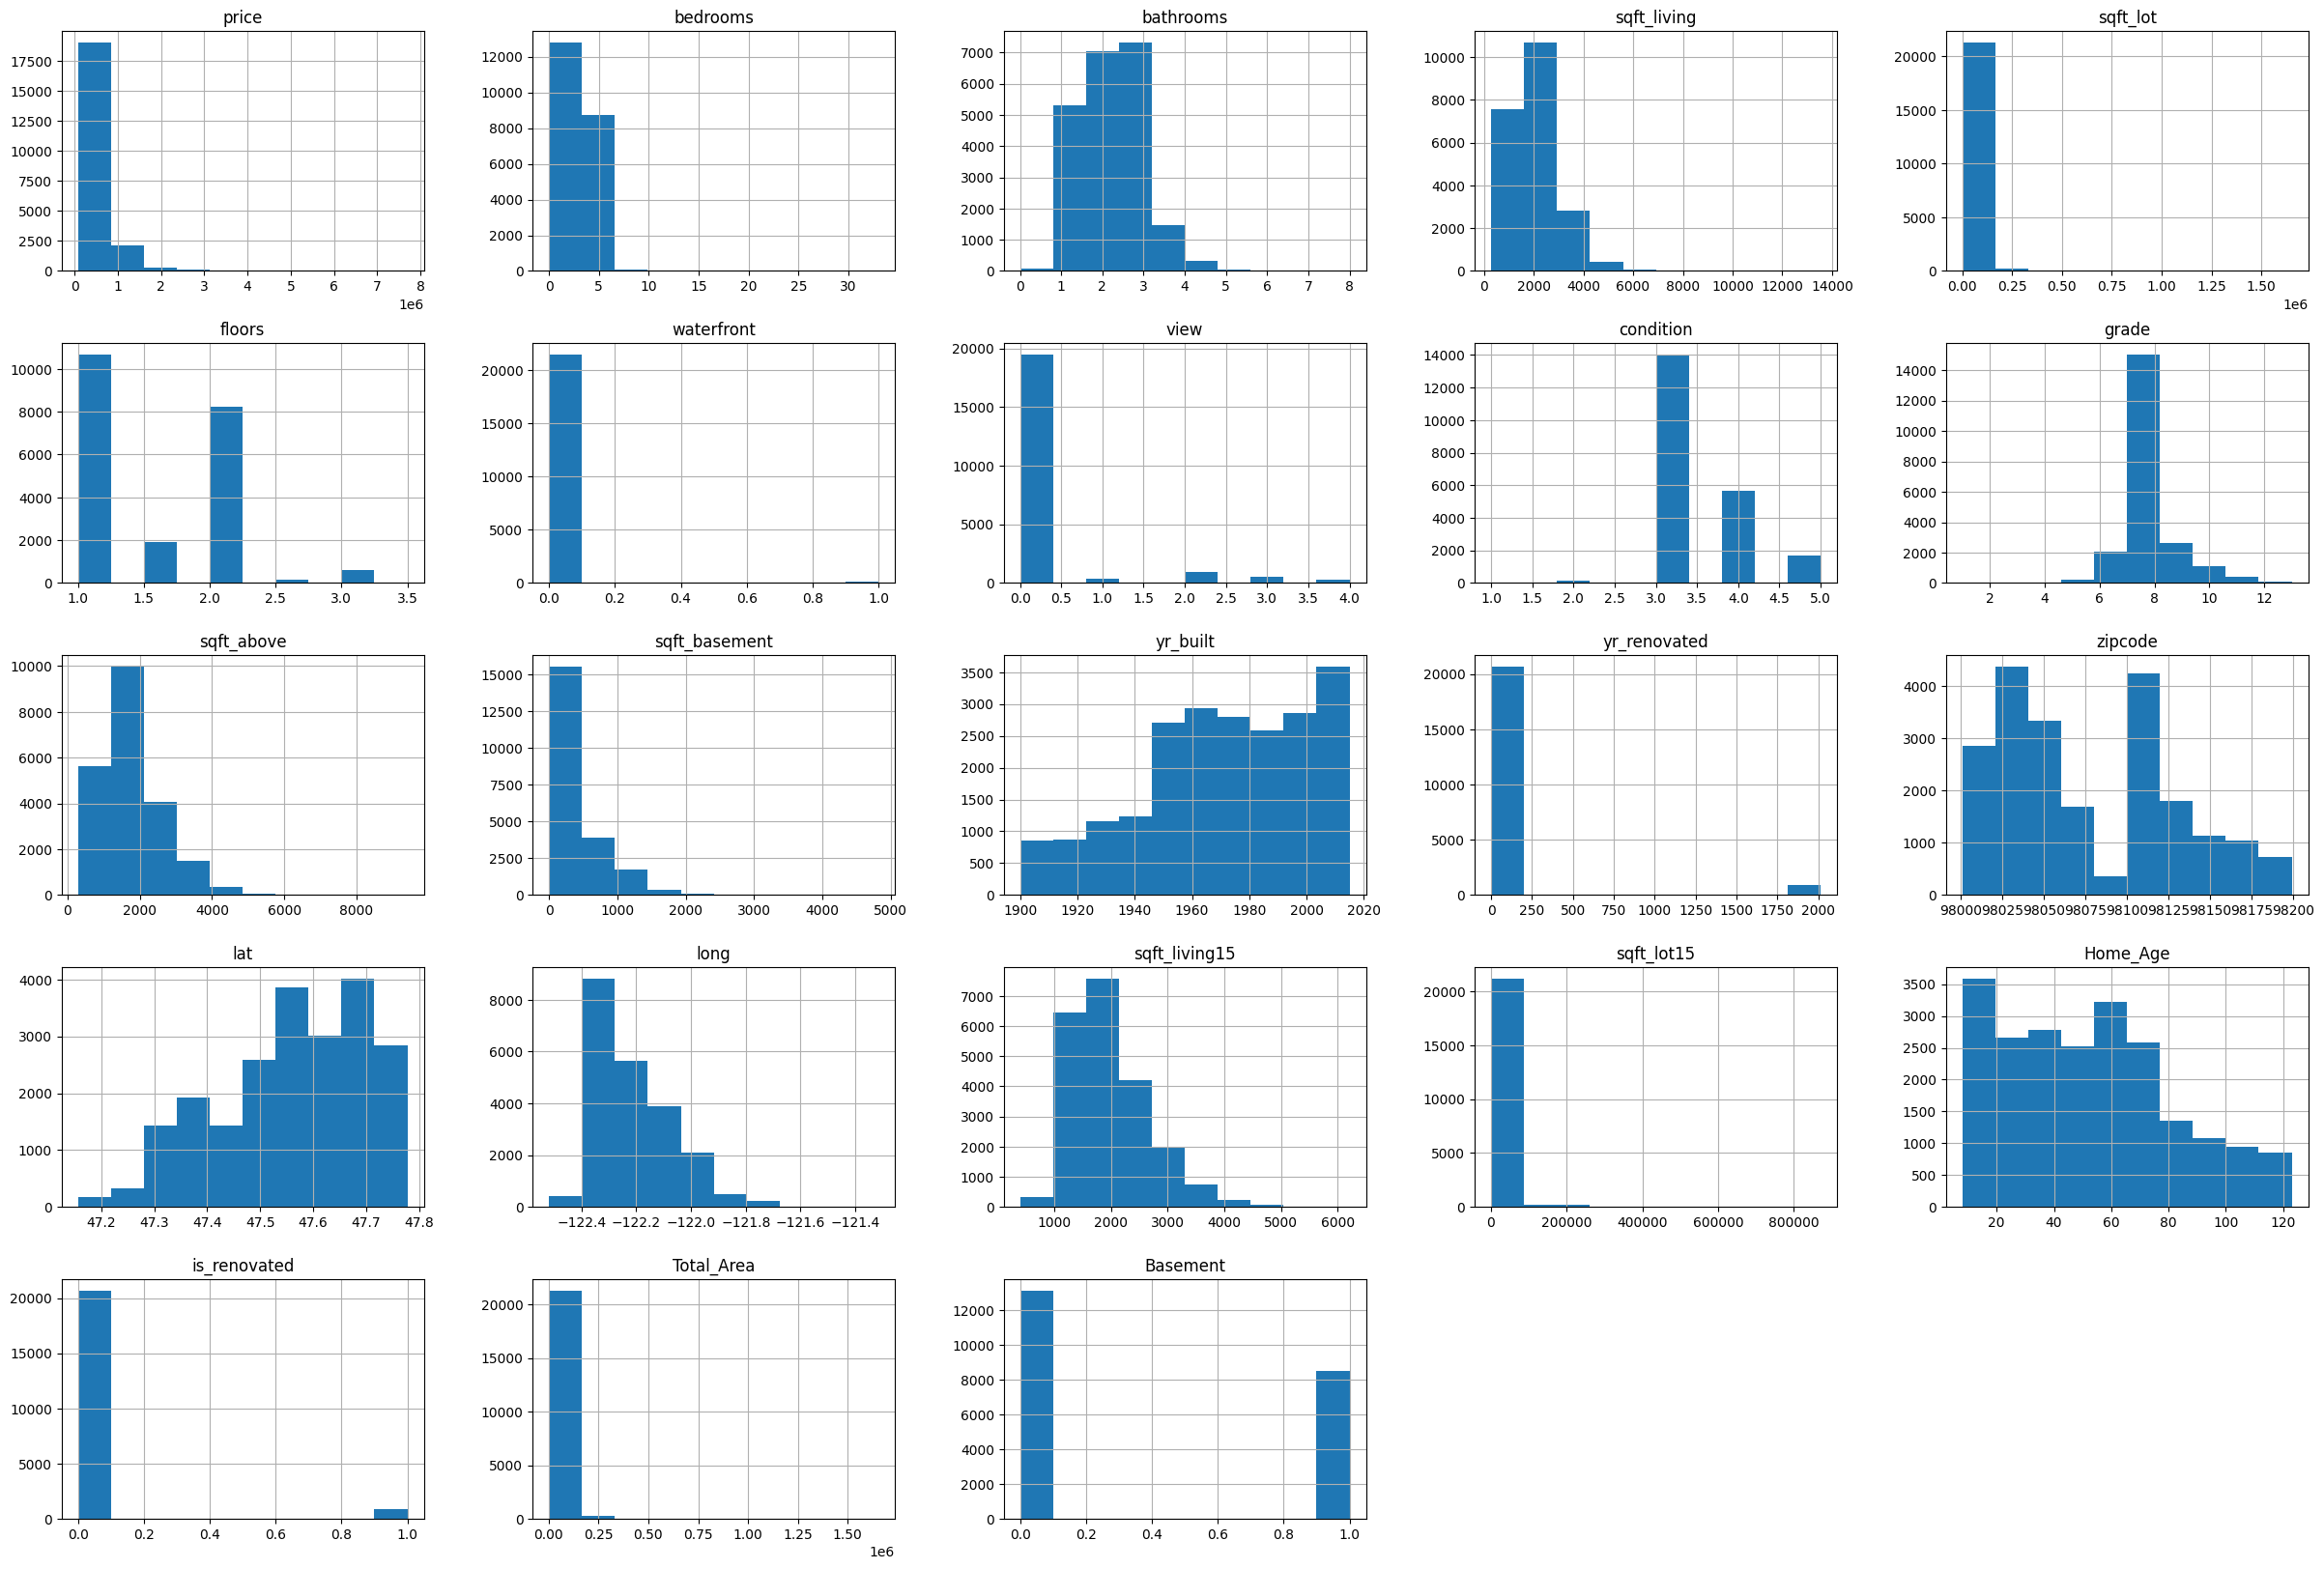

In [ ]:
data.hist(figsize=(30,20))
plt.show()

Data Preprocessing

Data preprocessing is manipulating data including dropping irrelevant and/or incomplete features, and/or mining data to ensure a better model performance. The popular phrase “garbage in, garbage out” is particularly important in machine learning, no matter how powerful your model is, it is useless with bad data.

In [ ]:
# our main target is pricing

data = data.drop([ 'sqft_lot15', 'long',
                                  'waterfront', 'condition', 'zipcode',
                                 'yr_renovated', 'is_renovated', 'Basement',
                                 'Home_Age', 'yr_built', 'sqft_living15',
                                 'sqft_basement', 'bathrooms',
                                 'lat', 'bedrooms', 'Total_Area',
                                 'floors', 'view'],axis=1)

In [ ]:
data.shape

(21611, 5)

we can use a Standard scaler to scale our features, we will be using Sci-kit learn’s in-built standard scaler, but first, we will divide our data into the features and the target, using X for features and Y for the target and then divide into train and test data, again using Sci-kit learn’s train-test-split method. w

we split our data into a training size of 70% and a test size of 30%, it is important to split your data into training and test sets to evaluate how your model will perform on new data to ensure it is not overfitting on your training data

In [ ]:
# test train model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=1)

In [ ]:
sc = StandardScaler() #instantiating Standard scaler
x_train_sc = pd.DataFrame(sc.fit_transform(x_train))
x_test_sc = pd.DataFrame(sc.transform(x_test))

now that we’ve succeeded in wrangling, cleaning, and preprocessing our data, selecting/building prediction models comes next.

**Linear Regression**

Linear regression is a type of supervised machine learning algorithm(an algorithm that works with only labeled data)that computes the linear relationship between a dependent variable and one or more independent features.

In [ ]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred = LR.predict(x_train_sc)

Here we import linear regression, instantiate it and fit our train features and target, we then call predict on our train features and we are done.

We can check our model’s overall performance by using two metrics, rsquared(r2) score, and root mean squared error(RMSE);

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
r_squared = LR.score(x_test, y_test)
print(r_squared )

0.558999583806511


The R-squared score of 0.558999583806511 indicates that a large proportion of the variance in the test instances' prices is explained by the model. Now let's confirm our calculation using scikit-learn.

In [ ]:
LR_mse = mean_squared_error(y_train, pred)
LR_rmse = np.sqrt(LR_mse)
LR_rmse

1033427007200.1676

This means that on average we are about $1210905.1079284612 off(below or above) the real price in our prediction.

In [ ]:
### let us check our train target label;
y_train.describe()

AttributeError: ignored

In [ ]:
#####let us evaluate the test data
LR_test = LR.predict(x_test_sc)
LR_mse = mean_squared_error(y_test, LR_test)
LR_rmse = np.sqrt(LR_mse)
LR_rmse



1084407515335.2139

**Decision tree classifier**



In [ ]:
Tmodel =DecisionTreeClassifier()

In [ ]:
Tmodel.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
Tmodel_score_train = Tmodel.score(x_train,y_train)

In [ ]:
Tmodel_score_train

0.9527996298010181

In [ ]:
Tmodel_score_test = Tmodel.score(x_test,y_test)
Tmodel_score_test

0.00663170882171499

In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

r2 = r2_score(y_test, y_pred)
print('R-squared Score:', r2)

Mean Squared Error: 0.12972533333333333
R-squared Score: 0.47961847031556426
